In [1]:
import deeplabcut
import tensorflow as tf
import tensorrt as trt

print("TensorFlow version:", tf.__version__)
print("CUDA version:", tf.sysconfig.get_build_info()["cuda_version"])
print("cuDNN version:", tf.sysconfig.get_build_info()["cudnn_version"])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("tensorrt version:", trt.__version__)

2024-07-05 17:03:28.581333: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-05 17:03:28.610459: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading DLC 2.3.9...
TensorFlow version: 2.12.0
CUDA version: 11.8
cuDNN version: 8
Num GPUs Available:  1
tensorrt version: 10.0.1


2024-07-05 17:03:31.278797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:03:31.315057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:03:31.315086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
# only using experiment ONE to see how strongly it generalizes
deeplabcut.create_new_project('Moused_2', 'David', ['/home/box/coding/CTIR/videos/experiment_1/E1_front.avi', '/home/box/coding/CTIR/videos/experiment_1/E1_side.avi', '/home/box/coding/CTIR/videos/experiment_1/E1_top.avi',
                                                '/home/box/coding/CTIR/videos/experiment_2/E2_front.avi','/home/box/coding/CTIR/videos/experiment_2/E2_side.avi','/home/box/coding/CTIR/videos/experiment_2/E2_top.avi'])

Created "/home/box/coding/CTIR/Moused_2-David-2024-07-05/videos"
Created "/home/box/coding/CTIR/Moused_2-David-2024-07-05/labeled-data"
Created "/home/box/coding/CTIR/Moused_2-David-2024-07-05/training-datasets"
Created "/home/box/coding/CTIR/Moused_2-David-2024-07-05/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /home/box/coding/CTIR/videos/experiment_1/E1_front.avi to /home/box/coding/CTIR/Moused_2-David-2024-07-05/videos/E1_front.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_1/E1_side.avi to /home/box/coding/CTIR/Moused_2-David-2024-07-05/videos/E1_side.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_1/E1_top.avi to /home/box/coding/CTIR/Moused_2-David-2024-07-05/videos/E1_top.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_2/E2_front.avi to /home/box/coding/CTIR/Moused_2-David-2024-07-05/videos/E2_front.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_2/E2_side.av

'/home/box/coding/CTIR/Moused_2-David-2024-07-05/config.yaml'

In [2]:
config_path = '/home/box/coding/CTIR/Moused_2-David-2024-07-05/config.yaml'

In [5]:
deeplabcut.extract_frames(config_path, algo='uniform', userfeedback=False)

Config file read successfully.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 555.0  seconds.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 555.0  seconds.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 555.0  seconds.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 645.0  seconds.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 645.0  seconds.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 645.0  seconds.
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


In [3]:
deeplabcut.convertcsv2h5('/home/box/coding/CTIR/Moused_2-David-2024-07-05/config.yaml', scorer= 'David')

Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_2-David-2024-07-05/labeled-data/E1_front ?


Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_2-David-2024-07-05/labeled-data/E1_side ?
Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_2-David-2024-07-05/labeled-data/E1_top ?
Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_2-David-2024-07-05/labeled-data/E2_front ?
Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_2-David-2024-07-05/labeled-data/E2_side ?
Do you want to convert the csv file in folder: /home/box/coding/CTIR/Moused_2-David-2024-07-05/labeled-data/E2_top ?


In [30]:
deeplabcut.label_frames(config_path)

/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/napari/_qt/qt_viewer.py:424: UserWarning: Attempting to unbind an action which does not exists (napari:cycle_through_color_modes), this may have no effects. This can happen if your settings are out of date, if you upgraded napari, upgraded or deactivated a plugin, or made a typo in in your custom keybinding.
  action_manager.unbind_shortcut(action)


In [31]:
deeplabcut.check_labels(config_path)

Creating images with labels by David.


100%|██████████| 33/33 [00:03<00:00,  8.39it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [5]:
# There are many more functions you can set here, including which network to use. Check the docstring for full options you can do!
deeplabcut.create_training_dataset(config_path, num_shuffles=2, net_type='resnet_101', augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.8,
  1,
  (array([153, 121,  54, 188, 196,  12, 152, 204, 107, 169,  10, 201,  62,
          164, 192, 158,  70, 209, 200, 156,  60,  96, 198, 197,  21, 127,
          163,  78, 109, 186,   1, 143,  40,  76,  37, 175, 132,  23,  50,
          159,  47, 104,  77, 161,  56, 166, 102, 182,  15, 157, 135,  98,
          179, 177, 134,  38,   6,  57,  95, 155, 199, 202, 154, 100, 195,
          160,  59,  48, 113,  65, 150,  90, 115, 215, 118, 141, 165, 180,
          183, 147, 130,  49,  52,  74,  26,  45, 149,   4,  11, 218, 203,
           79,   8, 184,   5, 119, 194, 122,   7, 144,  99,  22,  68,  82,
           20, 139,  86,  14,  42, 124, 170, 171, 189,  75,  64,  55, 205,
           81,  58,  13, 125,  71,  72,  19,  32,  87, 110, 123, 142, 206,
          220, 172,  24,  94, 106,  16,  63, 128, 105,  28, 208,  89,  93,
          207,  83,  43,  92,  18, 145, 210, 193, 216, 111,  66, 117, 191,
          140, 101,  69,   2,  84,  17, 146, 187, 213,  30, 114, 176, 103,
          212

In [4]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


2024-07-05 17:03:45.977171: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:03:45.977250: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:03:45.977265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:03:46.495859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:03:46.495929: I tensorflow/compile

In [8]:
shuffle = 2
trainingsetindex = 0

trainposeconfigfile, testposeconfigfile, snapshotfolder = deeplabcut.return_train_network_path(config_path, shuffle=shuffle, trainingsetindex=trainingsetindex)

cfg_dlc = deeplabcut.auxiliaryfunctions.read_plainconfig(trainposeconfigfile)

cfg_dlc['scale_jitter_lo'] = 0.7
cfg_dlc['scale_jitter_up'] = 1.5
cfg_dlc['augmentationprobability'] = 0.8
cfg_dlc['batch_size'] = 4  # Adjusted batch size
cfg_dlc['elastic_transform'] = True
cfg_dlc['rotation'] = 180
cfg_dlc['covering'] = True
cfg_dlc['motion_blur'] = True
cfg_dlc['optimizer'] = "adam"
cfg_dlc['dataset_type'] = 'imgaug'
cfg_dlc['multi_step'] = [[1e-4, 2000], [5.0e-5, 4000], [1e-5, 6000]] 

deeplabcut.auxiliaryfunctions.write_plainconfig(trainposeconfigfile, cfg_dlc)

In [9]:
deeplabcut.train_network(config_path, shuffle=shuffle, trainingsetindex=trainingsetindex, saveiters=2000, maxiters=10000, displayiters=50)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14]],
 'all_joints_names': ['nose',
                      'ear_left',
                      'ear_right',
                      'front_paw_left',
                      'front_paw_right',
                      'body_center',
                      'tail_base',
                      'lever_tip',
                      'upper_lever_tip',
                      'stick_head',
                      'ball',
                      'sliding_door',
                      'plateau_middle_front',
                      'plateau_middle_back',
                      'plateau_right_front'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'augmentationprobability': 0.8,
 'batch_size': 4,
 'contrast': 

Selecting single-animal trainer
Batch Size is 4


/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2024-07-05 17:09:56.711306: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:09:56.711372: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:09:56.711386: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA 

Loading ImageNet-pretrained resnet_101


2024-07-05 17:09:57.228018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:09:57.228077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:09:57.228090: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:09:57.228417: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 17:09:57.228461: I tensorflow/core/co

Max_iters overwritten as 6000
Display_iters overwritten as 50
Save_iters overwritten as 2000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/box/coding/CTIR/Moused_2-David-2024-07-05/dlc-models/iteration-1/Moused_2Jul5-trainset80shuffle2/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'adam', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 4, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7],

2024-07-05 17:10:06.441814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
iteration: 50 loss: 0.1011 lr: 0.0001
iteration: 100 loss: 0.0320 lr: 0.0001
iteration: 150 loss: 0.0331 lr: 0.0001
iteration: 200 loss: 0.0288 lr: 0.0001
iteration: 250 loss: 0.0263 lr: 0.0001
iteration: 300 loss: 0.0236 lr: 0.0001
iteration: 350 loss: 0.0213 lr: 0.0001
iteration: 400 loss: 0.0204 lr: 0.0001
iteration: 450 loss: 0.0199 lr: 0.0001
iteration: 500 loss: 0.0183 lr: 0.0001
iteration: 550 loss: 0.0182 lr: 0.0001
iteration: 600 loss: 0.0178 lr: 0.0001
iteration: 650 loss: 0.0170 lr: 0.0001
iteration: 700 loss: 0.0161 lr: 0.0001
iteration: 750 loss: 0.0147 lr: 0.0001
iteration: 800 loss: 0.0145 lr: 0.0001
iteration: 850 loss: 0.0145 lr: 0.0001
iteration: 900 loss: 0.0141 lr: 0.0001
iteration: 950 loss: 0.0138 lr: 0.0001
iteration: 1000 loss: 0.0134 lr: 0.0001
iteration: 1050 loss: 0.0128 lr: 0.0001
iteration: 1100 loss: 0.0124 lr: 0.0001
iteration: 1150 loss: 

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14]],
 'all_joints_names': ['nose',
                      'ear_left',
                      'ear_right',
                      'front_paw_left',
                      'front_paw_right',
                      'body_center',
                      'tail_base',
                      'lever_tip',
                      'upper_lever_tip',
                      'stick_head',
                      'ball',
                      'sliding_door',
                      'plateau_middle_front',
                      'plateau_middle_back',
                      'plateau_right_front'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-1/UnaugmentedDataSet_Moused

Running  DLC_resnet101_Moused_2Jul5shuffle2_6000  with # of training iterations: 6000


2024-07-05 18:52:03.709013: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 18:52:03.709111: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 18:52:03.709125: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 18:52:03.709321: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 18:52:03.709333: I tensorflow/core/co

Running evaluation ...


223it [00:08, 25.62it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-6000
Results for 6000  training iterations: 80 2 train error: 5.58 pixels. Test error: 12.56  pixels.
With pcutoff of 0.6  train error: 4.28 pixels. Test error: 6.95 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 223/223 [00:43<00:00,  5.12it/s]


The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


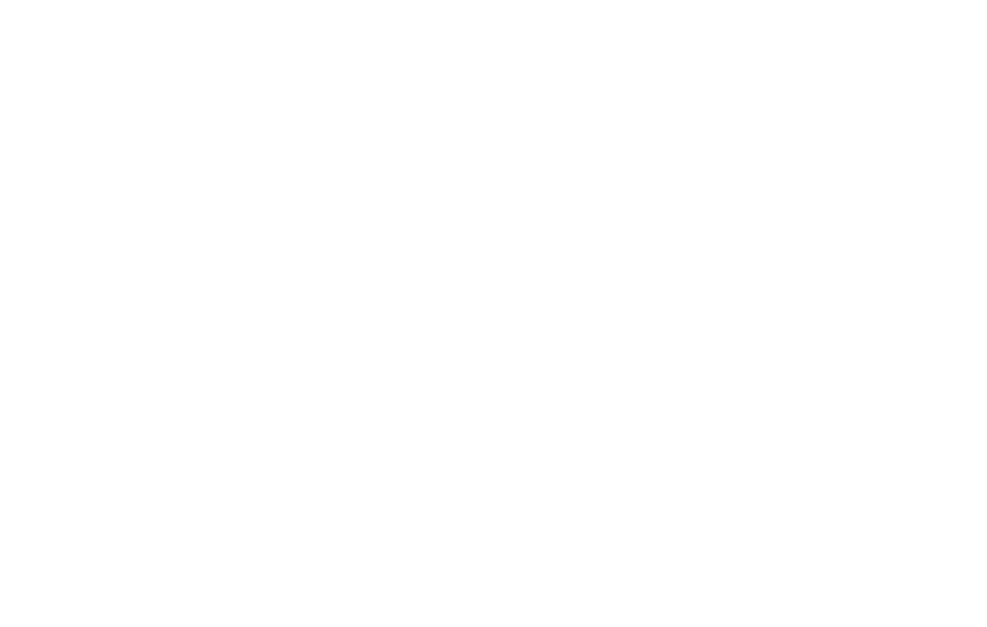

In [14]:
deeplabcut.evaluate_network(config_path,plotting=True, Shuffles=[2])

In [15]:
video_path = '/home/box/coding/CTIR/videos/experiment_1/E1_top.avi'
video_paths = ['/home/box/coding/CTIR/videos/experiment_1/E1_side.avi','/home/box/coding/CTIR/videos/experiment_1/E1_front.avi','/home/box/coding/CTIR/videos/experiment_1/E1_top.avi',
               '/home/box/coding/CTIR/videos/experiment_2/E2_side.avi','/home/box/coding/CTIR/videos/experiment_2/E2_front.avi','/home/box/coding/CTIR/videos/experiment_2/E2_top.avi']

In [16]:
deeplabcut.analyze_videos(config_path,video_paths)
deeplabcut.create_labeled_video(config_path,video_paths)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14]],
 'all_joints_names': ['nose',
                      'ear_left',
                      'ear_right',
                      'front_paw_left',
                      'front_paw_right',
                      'body_center',
                      'tail_base',
                      'lever_tip',
                      'upper_lever_tip',
                      'stick_head',
                      'ball',
                      'sliding_door',
                      'plateau_middle_front',
                      'plateau_middle_back',
                      'plateau_right_front'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-1/UnaugmentedDataSet_Moused

/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Using snapshot-10000 for model /home/box/coding/CTIR/Moused_2-David-2024-07-05/dlc-models/iteration-1/Moused_2Jul5-trainset80shuffle1


2024-07-05 18:53:46.724092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 18:53:46.724170: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 18:53:46.724183: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 18:53:46.724464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 18:53:46.724522: I tensorflow/core/co

Starting to analyze %  /home/box/coding/CTIR/videos/experiment_1/E1_side.avi
Loading  /home/box/coding/CTIR/videos/experiment_1/E1_side.avi
Duration of video [s]:  555.0 , recorded with  30.0 fps!
Overall # of frames:  16650  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 16650/16650 [04:05<00:00, 67.85it/s]


Saving results in /home/box/coding/CTIR/videos/experiment_1...
Starting to analyze %  /home/box/coding/CTIR/videos/experiment_1/E1_front.avi
Loading  /home/box/coding/CTIR/videos/experiment_1/E1_front.avi
Duration of video [s]:  555.0 , recorded with  30.0 fps!
Overall # of frames:  16650  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 16650/16650 [03:54<00:00, 70.86it/s]


Saving results in /home/box/coding/CTIR/videos/experiment_1...
Starting to analyze %  /home/box/coding/CTIR/videos/experiment_1/E1_top.avi
Loading  /home/box/coding/CTIR/videos/experiment_1/E1_top.avi
Duration of video [s]:  555.0 , recorded with  30.0 fps!
Overall # of frames:  16650  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 16650/16650 [03:55<00:00, 70.84it/s]


Saving results in /home/box/coding/CTIR/videos/experiment_1...
Starting to analyze %  /home/box/coding/CTIR/videos/experiment_2/E2_side.avi
Loading  /home/box/coding/CTIR/videos/experiment_2/E2_side.avi
Duration of video [s]:  645.0 , recorded with  30.0 fps!
Overall # of frames:  19350  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 19350/19350 [04:33<00:00, 70.76it/s]


Saving results in /home/box/coding/CTIR/videos/experiment_2...
Starting to analyze %  /home/box/coding/CTIR/videos/experiment_2/E2_front.avi
Loading  /home/box/coding/CTIR/videos/experiment_2/E2_front.avi
Duration of video [s]:  645.0 , recorded with  30.0 fps!
Overall # of frames:  19350  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 19350/19350 [04:32<00:00, 70.93it/s]


Saving results in /home/box/coding/CTIR/videos/experiment_2...
Starting to analyze %  /home/box/coding/CTIR/videos/experiment_2/E2_top.avi
Loading  /home/box/coding/CTIR/videos/experiment_2/E2_top.avi
Duration of video [s]:  645.0 , recorded with  30.0 fps!
Overall # of frames:  19350  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 19350/19350 [04:32<00:00, 70.97it/s]

Saving results in /home/box/coding/CTIR/videos/experiment_2...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


Starting to process video: /home/box/coding/CTIR/videos/experiment_1/E1_top.aviStarting to process video: /home/box/coding/CTIR/videos/experiment_2/E2_side.aviStarting to process video: /home/box/coding/CTIR/videos/experiment_1/E1_side.aviStarting to process video: /home/box/coding/CTIR/videos/experiment_1/E1_front.aviStarting to process video: /home/box/coding/CTIR/videos/experiment_2/E2_top.aviStarting to process video: /home/box/coding/CTIR/videos/experiment_2/E2_front.avi





Loading /home/box/coding/CTIR/videos/experiment_1/E1_top.avi and data.Loading /home/box/coding/CTIR/videos/experiment_2/E2_side.avi and data.Loading /home/box/coding/CTIR/videos/experiment_2/E2_top.avi and data.Loading /home/box/coding/CTIR/videos/experiment_1/E1_front.avi and data.Loading /home/box/coding/CTIR/videos/experiment_2/E2_front.avi and data.Loading /home/box/coding/CTIR/videos/experiment_1/E1_side.avi and data.





Duration of video [s]: 645.0, recorded with 30.0 fps!Duration of video [s]: 555.0,

  0%|          | 0/19350 [00:00<?, ?it/s]

Duration of video [s]: 555.0, recorded with 30.0 fps!


  0%|          | 0/16650 [00:00<?, ?it/s]

Overall # of frames: 16650 with cropped frame dimensions: 968 608

  0%|          | 0/19350 [00:00<?, ?it/s]


Generating frames and creating video.


100%|██████████| 19350/19350 [02:33<00:00, 126.18it/s]


[True, True, True, True, True, True]